# <span style="color:green"> Numerical Simulation Laboratory (NSL) Exercise 2 Results </span>

## 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$


In the following part we show the results for the estimation of $I$ with a uniform samplig and using important samplig, as can be seen the use of important sampling reduce the uncertanties of the results.

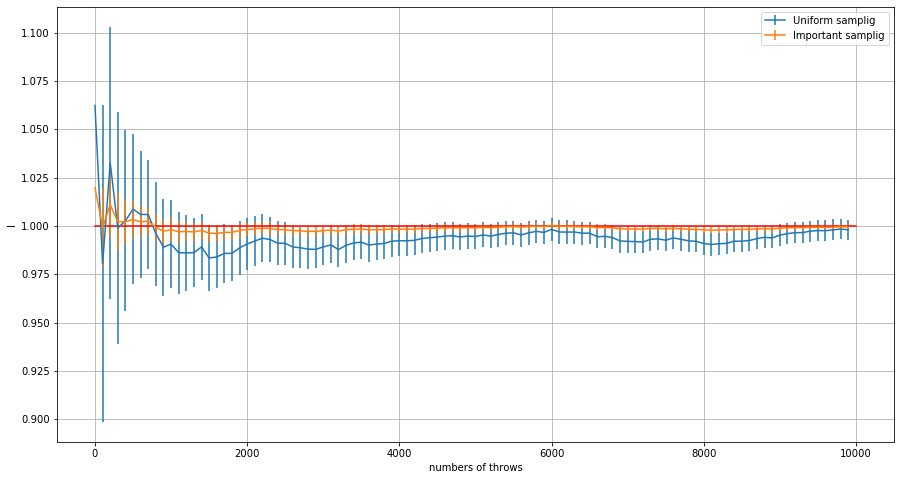

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import subprocess
import os
M = 10**4
N = 100

path = os.path.join(os.getcwd(), "integral/")

using_importance_sampling = False
subprocess.run(["./integral", str(M), str(N), str(int(using_importance_sampling))], cwd=path)
r, t = np.loadtxt("integral/integral.dat", unpack = True)

using_importance_sampling = True
subprocess.run(["./integral", str(M), str(N), str(int(using_importance_sampling))], cwd=path)
r_i, t_i = np.loadtxt("integral/integral.dat", unpack = True)

x = M//N * np.arange(N)
plt.figure(figsize=(15, 8))
plt.errorbar(x, r, yerr=t, label= 'Uniform samplig')
plt.errorbar(x,  r_i, yerr=t_i, label='Important samplig')
plt.plot([1,M], [1, 1],'r')
plt.legend()
plt.xlabel('numbers of throws')
plt.ylabel('I')
plt.grid(True)
plt.show()

## 02.2
3D Random Walks (RW) on a cubic lattice and in the continuum

We show the results for $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ of a random walk in the lattice and continuum scenario, we have fit the results with a  $f(N)=k\sqrt{N}$, where k has been identify as about 0.9.
In both case we does not found indications of a diffusive behaviour.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def lattice_RW(a, steps, output_distance=False):
    """ Returns an array of points (one for every step) or (output_distance=True) their distance from the origin """
    possible_moves = a * np.array([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]], dtype=np.int)
    moves = np.zeros((steps + 1, 3)) # add starting point (0,0,0) (just for graph's sake, 0+A=A)    
    moves[1:,:] = possible_moves[np.random.randint(0, 6, steps, dtype=np.int)]
    RW = np.cumsum(moves, axis=0)
    if output_distance: return np.linalg.norm(RW, axis=1)
    return RW

def continuum_RW(a, steps, output_distance=False):
    spherical2cartesian = lambda theta, phi: a * np.array([np.sin(phi) * np.cos(theta), 
                                                           np.sin(phi) * np.sin(theta), 
                                                           np.cos(phi)])
        
    theta = np.random.rand(steps) * np.pi
    phi = np.random.rand(steps) * 2*np.pi
    
    moves = np.zeros((steps + 1, 3))
    moves[1:,:] = spherical2cartesian(theta, phi).transpose()
    RW = np.cumsum(moves, axis=0)
    if output_distance: return np.linalg.norm(RW, axis=1)  
    return RW

def estimate_sample_mean(sample):
    """ Rows of input are the experiments, cols the different measured quantities """
    mean = np.mean(sample, axis=0)
    mean_sq = np.mean(sample**2, axis=0)
    devstd = np.sqrt((mean_sq - mean**2) / (np.size(sample,0) - 1))
    return mean, devstd

def plot3d_RW(RW, highlight_origin=True):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(15,8)) 
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(RW[:,0], RW[:,1], RW[:,2]);
    if highlight_origin: ax.plot([0],[0],[0],'ro');
        
def plot_mean(mean, err, title):
    plt.figure(figsize=(15, 8))
    
    x = np.arange(np.size(mean, 0))

    # estimate k
    k = np.mean(mean[1:] / np.sqrt(x[1:])) # 1:, better to ignore (0,0)

    plt.errorbar(x, mean, yerr=err, fmt='.', label='<r_N>')
    plt.plot(x, k*np.sqrt(x), linewidth=2, label=f'{k}\sqrt(N)')
    plt.xlabel('N (steps)')
    plt.title(title)
    plt.grid(True)
    plt.legend();

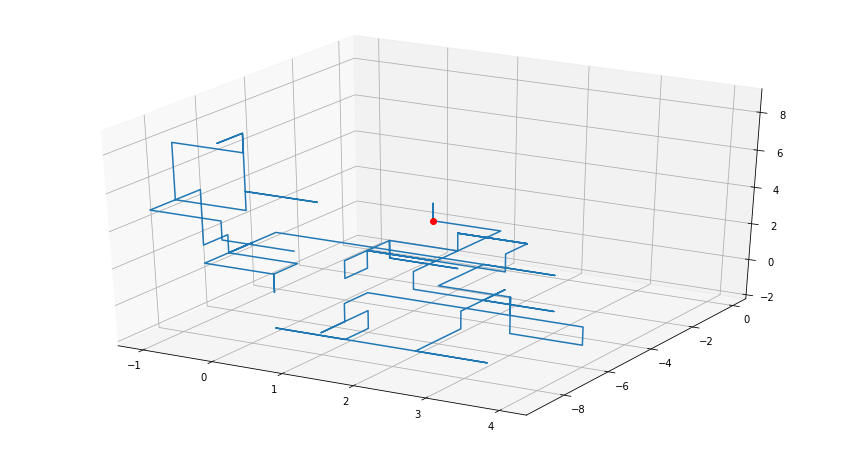

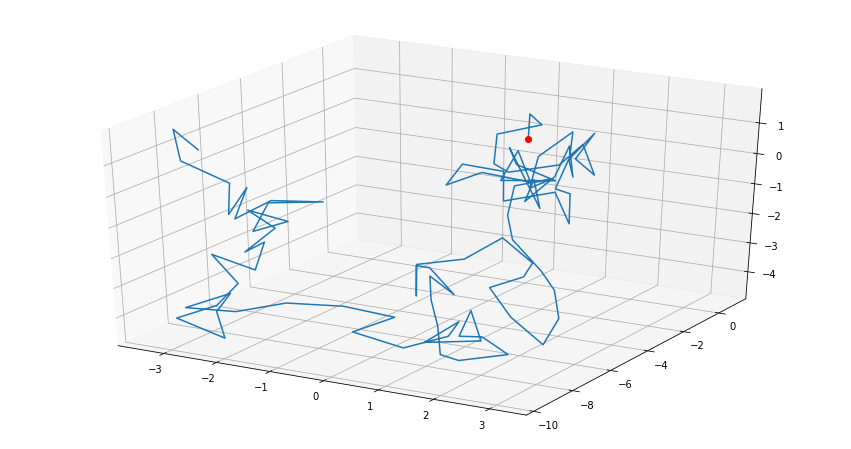

In [6]:
np.random.seed(0)
# lattice
plot3d_RW(lattice_RW(1, 10**2))
# continuum
plot3d_RW(continuum_RW(1, 10**2))

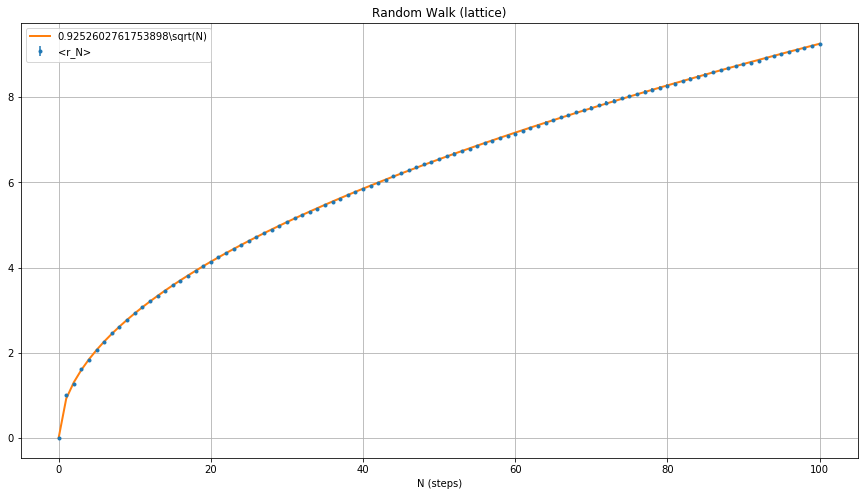

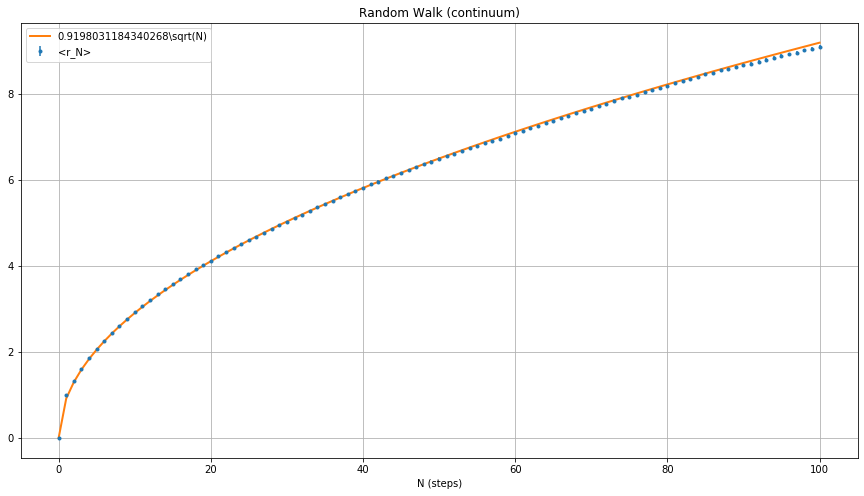

In [7]:
M = 10**4
steps = 100
path = os.path.join(os.getcwd(), "rw/")
RW_lattice = True
subprocess.run(["./main", str(M), str(steps),  str(int(RW_lattice))], cwd=path)
mean, devstd = np.loadtxt("rw/reti.dat", unpack=True)
RW_lattice = False
subprocess.run(["./main", str(M), str(steps),  str(int(RW_lattice))], cwd=path)
mean_c, devstd_c = np.loadtxt("rw/reti.dat", unpack=True)

plot_mean(mean, devstd, 'Random Walk (lattice)')
plot_mean(mean_c, devstd_c, 'Random Walk (continuum)')